**Step 1 - Facial Landmark Extraction**

In [ ]:
# Import necessary libraries
import os
import cv2
import dlib
import pickle

# Load the Dlib shape predictor
predictor_path = r"C:\Users\admin\Downloads\Assignment_AIL\shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)

# Define a function to gather facial landmarks using Dlib's face landmark model
def gather_landmark_data(directory):
    # Dictionary to store the path of each image as the key and its landmarks as the value
    landmark_data = {}

    # Iterate over each class directory (e.g., different facial expressions)
    for class_name in os.listdir(directory):
        # Iterate over each image in the class directory
        for filename in os.listdir(os.path.join(directory, class_name)):
            img_path = os.path.join(directory, class_name, filename)
            # Read the image using OpenCV
            img = cv2.imread(img_path)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Detect faces in the image
            faces = detector(gray)
            if faces:
                # Get the first face detected
                face = faces[0]
                # Predict the landmarks
                shape = predictor(gray, face)
                coords = []
                # Extract (x, y) coordinates for each landmark
                for i in range(68):
                    coords.append((shape.part(i).x, shape.part(i).y))
                # Store landmarks in the dictionary
                landmark_data[img_path] = coords
            else:
                # Print a message if no face is detected in the image
                print(f"No face detected in {img_path}. Skipping...")

    return landmark_data

def visualize_landmarks(img_path, landmarks):
    img = cv2.imread(img_path)
    for (x, y) in landmarks:
        cv2.circle(img, (x, y), 3, (0, 255, 0), -1)

    cv2.imshow('Landmarks', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Define a function to save the landmark data to a file using pickle
def save_landmark_data(landmark_data, filepath):
    with open(filepath, 'wb') as f:
        pickle.dump(landmark_data, f)

# Specify the directory containing the facial images
directory = r'C:\Users\admin\Downloads\Assignment_AIL - Copy\data\train'
# Gather landmarks for each image in the specified directory
landmark_data = gather_landmark_data(directory)

# Define the output path for the pickle file and save the landmark data
output_filepath = r'C:\Users\admin\Downloads\Assignment_AIL - Copy\data\train.pkl'
save_landmark_data(landmark_data, output_filepath)


In [ ]:
# Import necessary libraries
import os
import cv2
import dlib
import pickle

# Load the Dlib shape predictor
predictor_path = r"C:\Users\admin\Downloads\Assignment_AIL\shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)

# Define a function to gather facial landmarks using Dlib's face landmark model
def gather_landmark_data(directory):
    # Dictionary to store the path of each image as the key and its landmarks as the value
    landmark_data = {}

    # Iterate over each class directory (e.g., different facial expressions)
    for class_name in os.listdir(directory):
        # Iterate over each image in the class directory
        for filename in os.listdir(os.path.join(directory, class_name)):
            img_path = os.path.join(directory, class_name, filename)
            # Read the image using OpenCV
            img = cv2.imread(img_path)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Detect faces in the image
            faces = detector(gray)
            if faces:
                # Get the first face detected
                face = faces[0]
                # Predict the landmarks
                shape = predictor(gray, face)
                coords = []
                # Extract (x, y) coordinates for each landmark
                for i in range(68):
                    coords.append((shape.part(i).x, shape.part(i).y))
                # Store landmarks in the dictionary
                landmark_data[img_path] = coords
            else:
                # Print a message if no face is detected in the image
                print(f"No face detected in {img_path}. Skipping...")

    return landmark_data

def visualize_landmarks(img_path, landmarks):
    img = cv2.imread(img_path)
    for (x, y) in landmarks:
        cv2.circle(img, (x, y), 3, (0, 255, 0), -1)

    cv2.imshow('Landmarks', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Define a function to save the landmark data to a file using pickle
def save_landmark_data(landmark_data, filepath):
    with open(filepath, 'wb') as f:
        pickle.dump(landmark_data, f)

# Specify the directory containing the facial images
directory = r'C:\Users\admin\Downloads\Assignment_AIL - Copy\data\test'
# Gather landmarks for each image in the specified directory
landmark_data = gather_landmark_data(directory)

# Define the output path for the pickle file and save the landmark data
output_filepath = r'C:\Users\admin\Downloads\Assignment_AIL - Copy\data\test.pkl'
save_landmark_data(landmark_data, output_filepath)

**Step 2 - Data Training**

Valid items count: 4562
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters found:  {'C': 10, 'gamma': 1, 'kernel': 'linear'}
Best cross-validation F1 score: 0.82


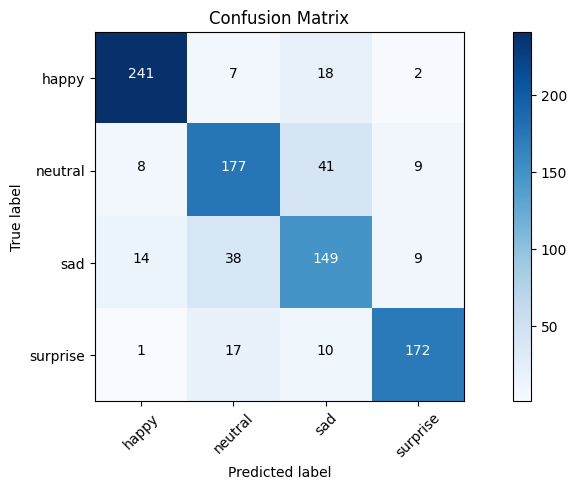

Classification Accuracy: 80.94%
Weighted F1 Score: 81.06%

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91       268
           1       0.74      0.75      0.75       235
           2       0.68      0.71      0.70       210
           3       0.90      0.86      0.88       200

    accuracy                           0.81       913
   macro avg       0.81      0.81      0.81       913
weighted avg       0.81      0.81      0.81       913



In [ ]:
# Import the necessary libraries and modules
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import itertools
import os

# Function to load landmark data from a specified path
def load_data(file_path):
    with open(file_path, 'rb') as f:
        return pickle.load(f)

# Convert the landmarks dictionary to data arrays and their corresponding labels
def convert_dict_to_arrays(data_dict):
    data, labels = [], []
    for img_path, landmarks in data_dict.items():
        if landmarks is not None and len(landmarks) > 0:
            data.append(np.array(landmarks).flatten())
            path_parts = img_path.split("\\")
            if len(path_parts) >= 3:
                label = path_parts[-2]
                labels.append(label)

    print(f"Valid items count: {len(data)}")
    return np.asarray(data), np.asarray(labels)

# Function to normalize the landmark data
def normalize_data(data):
    normalized_data = []
    for landmarks in data:
        # Reshape landmark vector to pairs of (x, y) coordinates
        landmarks = landmarks.reshape(-1, 2)
        
        # Calculate min and max values
        x_min, y_min = np.min(landmarks, axis=0)
        x_max, y_max = np.max(landmarks, axis=0)
        
        # Compute width and height for normalization
        width, height = x_max - x_min, y_max - y_min
        if width > 0 and height > 0:
            landmarks_normalized = (landmarks - [x_min, y_min]) / [width, height]
            normalized_data.append(landmarks_normalized.flatten())
        else:
            # Append original if normalization is not possible
            normalized_data.append(landmarks.flatten())
    
    return np.asarray(normalized_data)

# Function to tune hyperparameters for the SVM model using GridSearch
def tune_hyperparameters(x_train, y_train):
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': [0.001, 0.01, 0.1, 1],
        'kernel': ['rbf', 'linear']
    }
    svm = SVC(probability=True)
    grid_search = GridSearchCV(estimator=svm, param_grid=param_grid,
                               cv=3, n_jobs=-1, verbose=2, scoring='f1_weighted')
    grid_search.fit(x_train, y_train)
    print("Best parameters found: ", grid_search.best_params_)
    print("Best cross-validation F1 score: {:.2f}".format(grid_search.best_score_))
    return grid_search.best_estimator_

# Function to evaluate the model's performance on the test set
def evaluate_model(model, x_test, y_test):
    y_predict = model.predict(x_test)
    accuracy = accuracy_score(y_predict, y_test)
    f1 = f1_score(y_test, y_predict, average='weighted')
    report = classification_report(y_test, y_predict)
    matrix = confusion_matrix(y_test, y_predict)
    return accuracy, f1, report, matrix

# Plot a confusion matrix to visualize the classification results
def plot_confusion_matrix(matrix, labels, title='Confusion Matrix'):
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Display accuracy, F1 score, confusion matrix, and classification report
def plot_metrics(matrix, labels, accuracy, f1, report):
    plt.figure(figsize=(10,5))
    plot_confusion_matrix(matrix, labels)
    plt.show()
    print(f"Classification Accuracy: {accuracy*100:.2f}%")
    print(f"Weighted F1 Score: {f1*100:.2f}%")
    print("\nClassification Report:\n", report)

# Save the trained model to a specified path for future use
def save_model(model, label_encoder, file_path):
    with open(file_path, 'wb') as f:
        pickle.dump({'model': model, 'label_encoder': label_encoder}, f)

# Main execution begins here
try:
    # Load and preprocess the training data
    train_data_dict = load_data(r'C:\\Users\\admin\\Downloads\\Assignment_AIL - Copy\\data\\train.pkl')
    train_data, train_labels = convert_dict_to_arrays(train_data_dict)
    normalized_train_data = normalize_data(train_data)
    scaler = StandardScaler()
    train_data_scaled = scaler.fit_transform(normalized_train_data)

    # Load and preprocess the testing data
    test_data_dict = load_data(r'C:\\Users\\admin\\Downloads\\Assignment_AIL - Copy\\data\\test.pkl')
    test_data, test_labels = convert_dict_to_arrays(test_data_dict)
    normalized_test_data = normalize_data(test_data)
    test_data_scaled = scaler.transform(normalized_test_data)

    # Encode labels
    label_encoder = LabelEncoder()
    train_labels_encoded = label_encoder.fit_transform(train_labels)
    test_labels_encoded = label_encoder.transform(test_labels)
    label_classes = label_encoder.classes_

    # Tune model, evaluate it, and save the trained model
    best_model = tune_hyperparameters(train_data_scaled, train_labels_encoded)
    accuracy, f1, report, matrix = evaluate_model(best_model, test_data_scaled, test_labels_encoded)
    plot_metrics(matrix, label_classes, accuracy, f1, report)
    save_model(best_model, label_encoder, r'C:\Users\admin\Downloads\Assignment_AIL - Copy\emotion_model_100.pkl')

except Exception as e:
    print("An error occurred:", str(e))


**Step 3 - Testing**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


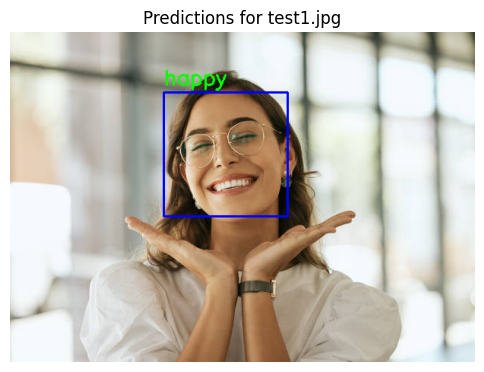

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


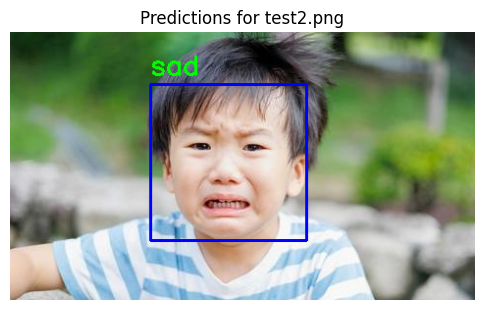

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


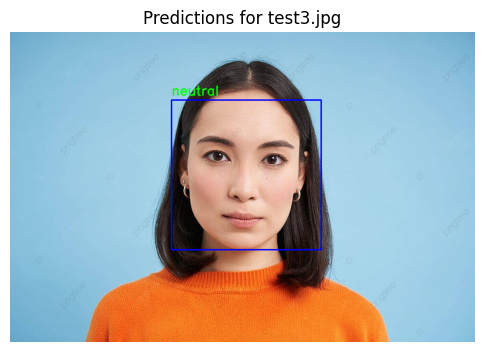

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


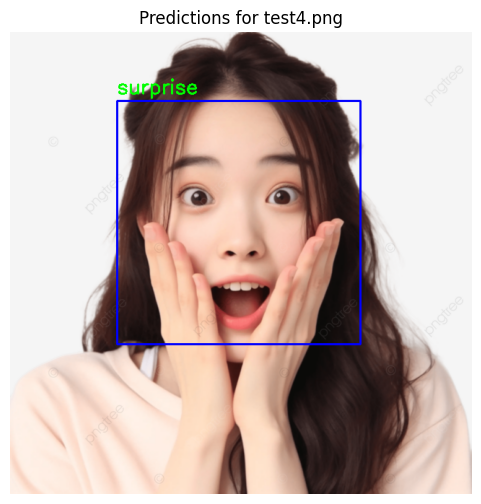

In [ ]:
import cv2
import pickle
import numpy as np
from matplotlib import pyplot as plt
import os

# Load the trained model from the pickle file
with open(r'C:\Users\admin\Downloads\Assignment_AIL - Copy\emotion_model_100.pkl', 'rb') as model_file:
    emotion_model = pickle.load(model_file)

# Define the label encoder for emotions
emotion_labels = ['happy', 'neutral', 'sad', 'surprise']

# Load Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Directory containing test images
test_images_dir = r"C:\Users\admin\Downloads\Assignment_AIL - Copy\test_images"

# Get list of all image files in the directory
image_files = [f for f in os.listdir(test_images_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Process each image
for image_file in image_files:
    # Load the image
    test_image_path = os.path.join(test_images_dir, image_file)
    test_image = cv2.imread(test_image_path)
    gray_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale for face detection

    # Detect faces
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # Draw a rectangle around the face
        cv2.rectangle(test_image, (x, y), (x + w, y + h), (255, 0, 0), 2)

        # Get the face region of interest (ROI)
        face_roi = gray_image[y:y + h, x:x + w]
        face_roi_resized = cv2.resize(face_roi, (48, 48))  # Resize to match model input size
        face_roi_normalized = face_roi_resized / 255.0  # Normalize pixel values
        face_roi_reshaped = face_roi_normalized.reshape(1, 48, 48, 1)  # Reshape for model input

        # Predict emotions
        predicted_probabilities = emotion_model.predict(face_roi_reshaped)[0]
        emotion_probs = dict(zip(emotion_labels, predicted_probabilities))
        top_emotion = max(emotion_probs, key=emotion_probs.get)

        # Display the predicted emotion on the image
        cv2.putText(test_image, top_emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Convert BGR to RGB for displaying in matplotlib
    test_image_rgb = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

    # Display the image in the notebook output
    plt.figure(figsize=(6, 6))
    plt.imshow(test_image_rgb)
    plt.axis('off')  # Turn off axis
    plt.title(f"Predictions for {image_file}")
    plt.show()
